In [1]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
import numpy as np

from csbdeep.utils import normalize
from glob import glob
from skimage import io
from stardist.matching import matching_dataset
from stardist.models import StarDist2D
from tqdm import tqdm

from utils import show_test_images, taus

In [2]:
image_dir = f'../images'
merfish_dir = f'{image_dir}/merfish'

model_dir = './models'

In [3]:
# 8 images (20%) chosen for test
merfish_X_test_names = sorted(glob(f'{merfish_dir}/test/images/*.tif'))
merfish_X_test = [normalize(img, 1, 99.8, axis=(0, 1)) for img in list(map(io.imread, merfish_X_test_names))]
merfish_Y_test_names = sorted(glob(f'{merfish_dir}/test/masks/*.tif'))
merfish_Y_test = list(map(io.imread, merfish_Y_test_names))

In [4]:
# Load from disk
auto_mask_merfish_model = StarDist2D(None, name='auto_mask_merfish_model', basedir=model_dir) 

Loading network weights from 'weights_best.h5'.
Couldn't load thresholds from 'thresholds.json', using default values. (Call 'optimize_thresholds' to change that.)
Using default values: prob_thresh=0.5, nms_thresh=0.4.


In [5]:
merfish_Y_pred = [auto_mask_merfish_model.predict_instances(x, n_tiles=auto_mask_merfish_model._guess_n_tiles(x), show_tile_progress=False)
              for x in tqdm(merfish_X_test)]

100%|██████████| 8/8 [02:19<00:00, 17.49s/it]


In [6]:
merfish_Y_pred_labels = [pred[0] for pred in merfish_Y_pred]
merfish_stats = [matching_dataset(merfish_Y_test, merfish_Y_pred_labels, thresh=t, show_progress=False) for t in tqdm(taus)]

100%|██████████| 9/9 [00:19<00:00,  2.21s/it]


In [7]:
merfish_stats

[DatasetMatching(criterion='iou', thresh=0.1, fp=2, tp=37, fn=6, precision=0.9487179487179487, recall=0.8604651162790697, accuracy=0.8222222222222222, f1=0.9024390243902439, n_true=43, n_pred=39, mean_true_score=0.6675670120716164, mean_matched_score=0.7758211221372839, panoptic_quality=0.7001312565629147, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.2, fp=2, tp=37, fn=6, precision=0.9487179487179487, recall=0.8604651162790697, accuracy=0.8222222222222222, f1=0.9024390243902439, n_true=43, n_pred=39, mean_true_score=0.6675670120716164, mean_matched_score=0.7758211221372839, panoptic_quality=0.7001312565629147, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.3, fp=2, tp=37, fn=6, precision=0.9487179487179487, recall=0.8604651162790697, accuracy=0.8222222222222222, f1=0.9024390243902439, n_true=43, n_pred=39, mean_true_score=0.6675670120716164, mean_matched_score=0.7758211221372839, panoptic_quality=0.7001312565629147, by_image=False),
 DatasetMatching(criterio

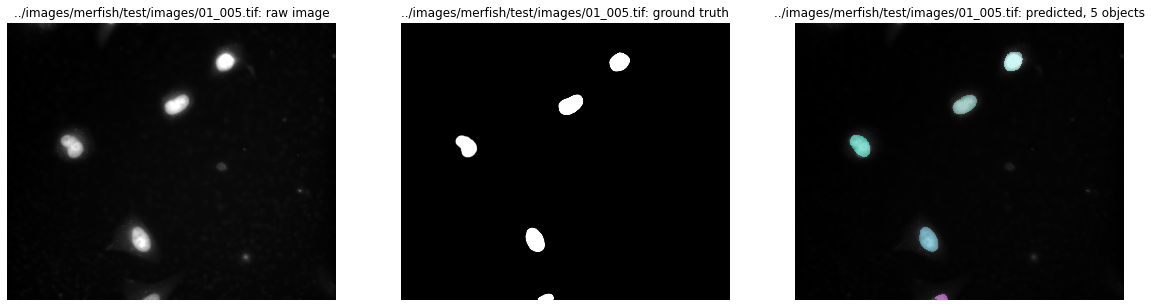

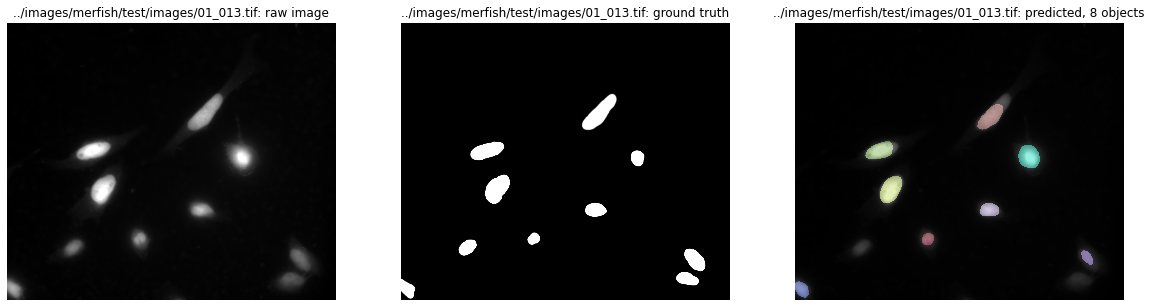

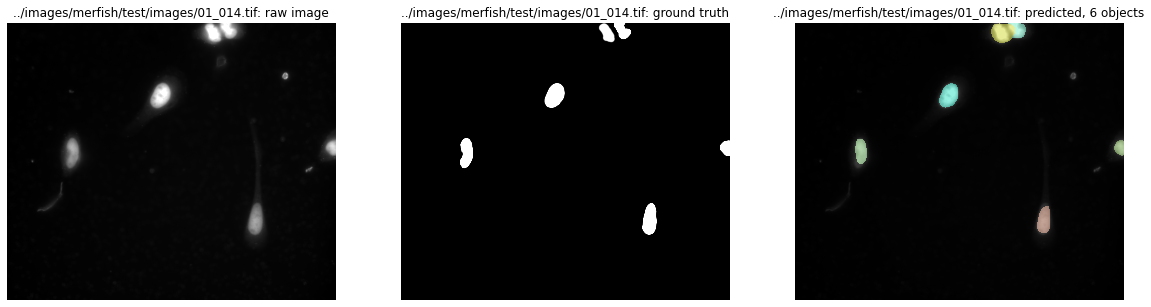

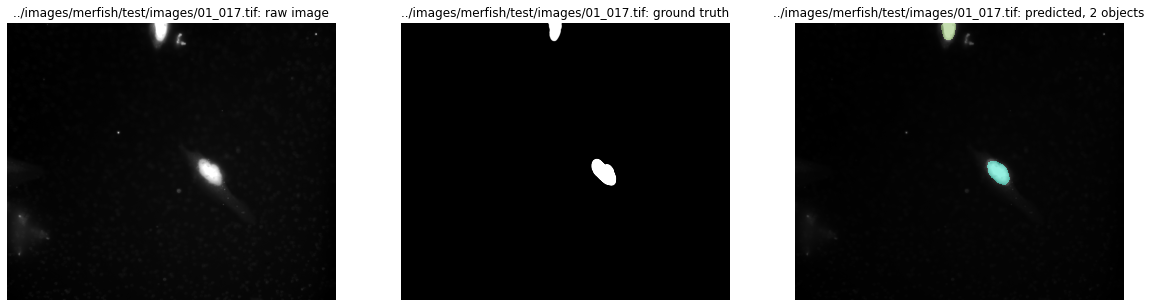

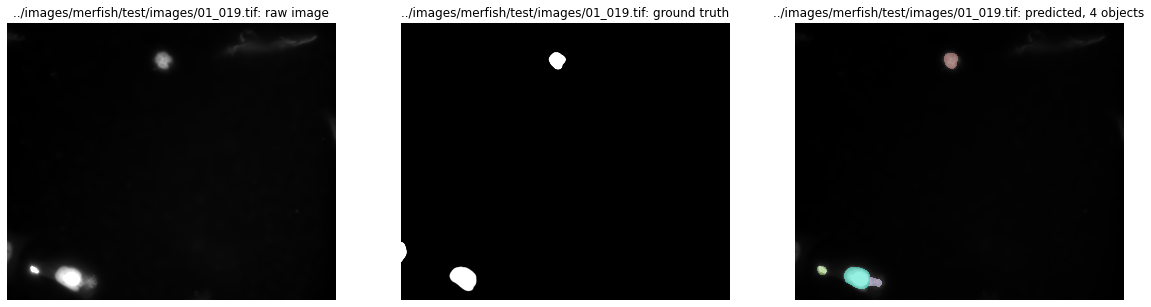

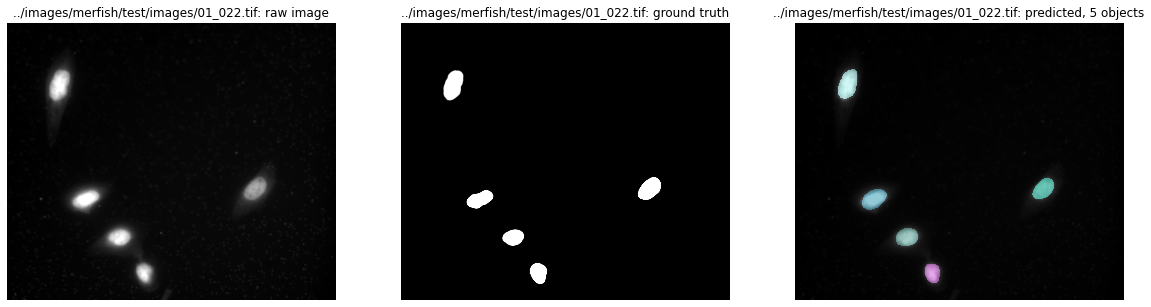

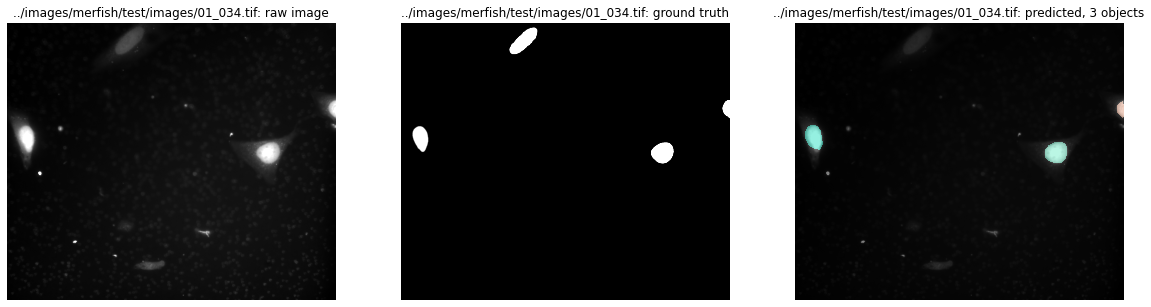

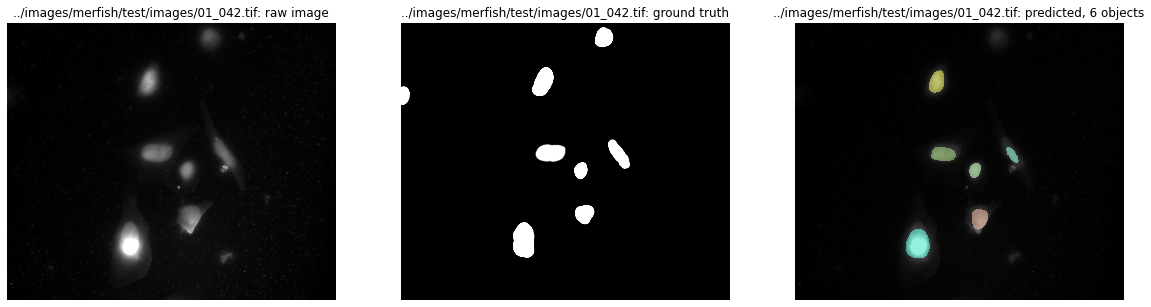

In [8]:
show_test_images(merfish_X_test, merfish_Y_test, merfish_Y_pred, merfish_X_test_names)